<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Natural Language Processing

### Learning Objectives
- Discuss the major tasks involved with natural language processing.
- Discuss, on a low level, the components of natural language processing.
- Do some EDA on a natural language processing dataset
- Identify why natural language processing is difficult.
- Demonstrate text classification on a multi-class problem.
- Demonstrate common text preprocessing techniques.

### How Do We Use NLP in Data Science?

In data science, we are often asked to analyze unstructured text or make a predictive model using it. Unfortunately, most data science techniques require numeric data. NLP libraries provide a tool set of methods to convert unstructured text into meaningful numeric data.

- **Analysis:** NLP techniques provide tools to allow us to understand and analyze large amounts of text. For example:

    - Analyze the positivity/negativity of comments on different websites. 
    - Extract key words from meeting notes and visualize how meeting topics change over time.

- **Vectorizing for machine learning:** When building a machine learning model, we typically must transform our data into numeric features. This process of transforming non-numeric data such as natural language into numeric features is called vectorization. For example:

    - Understanding related words. Using stemming, NLP lets us know that "swim", "swims", and "swimming" all refer to the same base word. This allows us to reduce the number of features used in our model.
    - Identifying important and unique words. Using TF-IDF (term frequency-inverse document frequency), we can identify which words are most likely to be meaningful in a document.

### Libraries we will use & things to download

In [1]:
!pip install wordcloud

In [ ]:
!conda install nltk

In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\gregb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
!conda install -c conda-forge spacy

In [3]:
!python -m spacy download en_core_web_sm

  Stored in directory: D:\Users\gregb\AppData\Local\Temp\1\pip-ephem-wheel-cache-kslw93f8\wheels\48\5c\1c\15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


## Lesson Guide

- [Introduction to Natural Language Processing](#intro)
- [Reading Yelp reviews With NLP](#yelp_rev)
- [Text Classification](#text_class)
- [Count Vectorization](#count_vec)
    - [Using CountVectorizer in a Model](#countvectorizer-model)
    - [N-Grams](#ngrams)
    - [Stop-Word Removal](#stopwords)
	- [Count Vector Options](#cvec_opt)
- [Intro to Spacy](#textblob)
	- [Parts of speech]
    - [Stemming and Lemmatization](#stem)
- [Term Frequency–Inverse Document Frequency Vectorization](#tfidf)
	- [Yelp Summary Using TF–IDF](#yelp_tfidf)
- [Sentiment Analysis](#sentiment)
- [BONUS: Adding Features to a Document-Term Matrix](#add_feat)
- [Conclusion](#conclusion)

## Introduction

### What Is Natural Language Processing (NLP)?

- Using computers to process (analyze, understand, generate) natural human languages.
- Making sense of human knowledge stored as unstructured text.
- Building probabilistic models using data about a language.

### What Are Some of the Higher-Level Task Areas?

- **Objective:** Discuss the major tasks involved with natural language processing.

We often hope that computers can solve many high-level problems involving natural language. Unfortunately, due to the difficulty of understanding human language, many of these problems are still not well solved. That said, existing solutions to these problems all involve utilizing the lower-level components of NLP discussed in the next section. Some higher-level tasks include:

- **Chatbots:** Understand natural language from the user and return intelligent responses.
    - [Api.ai](https://api.ai/)
- **Information retrieval:** Find relevant results and similar results.
    - [Google](https://www.google.com/)    
- **Information extraction:** Structured information from unstructured documents.
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation:** One language to another.
    - [Google Translate](https://translate.google.com/)
- **Text simplification:** Preserve the meaning of text, but simplify the grammar and vocabulary.
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input:** Faster or easier typing.
    - [Phrase completion application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis:** Attitude of speaker.
    - [Hater News](https://medium.com/@KevinMcAlear/building-hater-news-62062c58325c)
- **Automatic summarization:** Extractive or abstractive summarization.
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural language generation:** Generate text from data.
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation:** Speech-to-text, text-to-speech.
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering:** Determine the intent of the question, match query with knowledge base, evaluate hypotheses.
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What Are Some of the Lower-Level Components?

- **Objective:** Discuss, on a low level, the components of natural language processing.

Unfortunately, the NLP programming libraries typically do not provide direct solutions for the high-level tasks above. Instead, they provide low-level building blocks that enable us to craft our own solutions. These include:

- **Tokenization:** Breaking text into tokens (words, sentences, n-grams)
- **Stop-word removal:** a/an/the
- **Stemming and lemmatization:** root word
- **TF-IDF:** word importance
- **Part-of-speech tagging:** noun/verb/adjective
- **Named entity recognition:** person/organization/location
- **Spelling correction:** "New Yrok City"
- **Word sense disambiguation:** "buy a mouse"
- **Segmentation:** "New York City subway"
- **Language detection:** "translate this page"
- **Machine learning:** specialized models that work well with text

### Why is NLP hard?

- **Objective:** Identify why natural language processing is difficult.

Natural language processing requires an understanding of the language and the world. Several limitations of NLP are:

- **Ambiguity**:
    - Hospitals Are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English:** text messages
- **Idioms:** "throw in the towel"
- **Newly coined words:** "retweet"
- **Tricky entity names:** "Where is A Bug's Life playing?"
- **World knowledge:** "Mary and Sue are sisters", "Mary and Sue are mothers"

<a id='yelp_rev'></a>

## Reading in the Yelp Reviews

Throughout this lesson, we will use Yelp reviews to practice and discover common low-level NLP techniques.

You should be familiar with these terms, as they are frequently used in NLP:
- **corpus**: a collection of documents (derived from the Latin word for "body")
- **corpora**: plural form of corpus

In [4]:
import pandas as pd

In [5]:
yelp = pd.read_csv('data/yelp.csv', index_col='review_id', parse_dates=['date'])

In [7]:
yelp.sample(5)

,business_id,date,stars,text,type,user_id,cool,useful,funny
review_id,,,,,,,,,
PINoAXjJQpl3yobdDzy0Vg,v6zRA0WqOODJjmpvstrpGQ,2011-06-16,3,Today I went in for lunch and it seems the qua...,review,Iycf9KNRhxvR187Qu2zZHg,0,0,0
uPcQ_NkDwP5HmgyjvyVAAg,eGevCRobYnA_HSj60sEWvQ,2006-04-23,4,the food is excellent but the waiters and wait...,review,YoBu4TVcP5YHKOC35NPXQQ,0,3,0
PxcSbgfDs6yBh_6nBeNcQg,8ZwO9VuLDWJOXmtAdc7LXQ,2011-03-28,3,I was hoping for a more adult friendly place. ...,review,xg4AdOGHFxJyWByFbG8stA,1,2,0
nCzTSOBLvRfsXr208sHDYg,cc9KFNrcY9gA7t9D1a3FpA,2012-10-11,5,I have used Sandella's on three different occa...,review,m5-3onu1zp4l50V-PmZKgg,0,1,0
IokuZD7dpn8EUbOUe-vehQ,OE5nAmaSVaopeRS1Cs9Kuw,2011-09-28,4,Great service. Tasty food. I like it for lun...,review,IDHrwv_RCildFvmfWTkj5Q,0,1,0


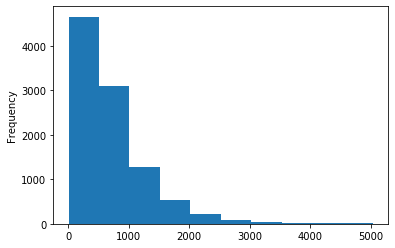

In [10]:
yelp['text_count'] = yelp.text.map(len)
yelp.text_count.plot.hist()

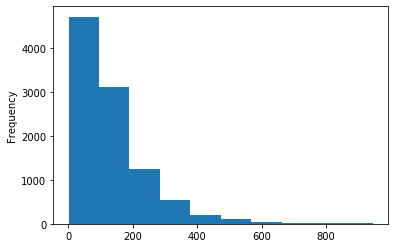

In [13]:
yelp['word_count'] = yelp.text.str.split(' ').map(len)
yelp['word_count'].plot.hist()

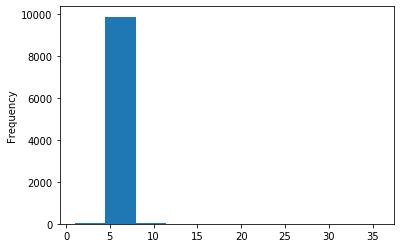

In [15]:
yelp['average_word_length'] = yelp.text_count / yelp.word_count
yelp.average_word_length.plot.hist()

In [16]:
yelp[yelp.average_word_length > 15]

,business_id,date,stars,text,type,user_id,cool,useful,funny,text_count,word_count,average_word_length
review_id,,,,,,,,,,,,
Qv1jJdZftPlfJef45OX3GQ,gUt-pPUpOVVhaCFC8-E4yQ,2011-03-27,5,Bomb ............................................,review,_tTNzjkD-pvWqSb-Ahw9Uw,0,0,0,143,4,35.75


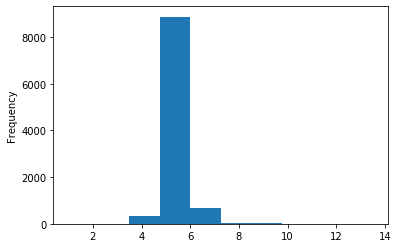

In [18]:
yelp[yelp.average_word_length < 15].average_word_length.plot.hist()

In [22]:
yelp['words'] = yelp.text.str.split(' ')
yelp['distinct_word_count'] = yelp.words.map(lambda x: len(set(x)))
yelp['lexical_diversity'] = yelp.distinct_word_count / yelp.word_count

In [25]:
yelp.groupby('user_id').lexical_diversity.mean().sort_values(ascending=False)

user_id
I7zvmDRYtsLUHsLi50wDNA    1.000000
Eq6j-P0ipCIlhI1GqrbpWQ    1.000000
H4XCAov3KP3JjThhExpocg    1.000000
HE8AOm5mO_sgap7_coM0RQ    1.000000
HEag_QERXNbyGmNgA6no2Q    1.000000
HOAFwraJMBTcYy1qTmFmgQ    1.000000
HavRojH3G8AlJchZXonaOg    1.000000
nURs-n-ucizNeoo280nmTQ    1.000000
Hqgx3IdJAAaoQjvrUnbNvw    1.000000
x1Yagv0rOlPd_NRu5t0SIA    1.000000
I6KftQl6q4I7IuKV7wPR7w    1.000000
IAOCwB3c2c_-6_Y5rAjXIg    1.000000
x4thcv_eJg2FBsb_E8P4sA    1.000000
n5PtmHO-PSHiyseG56XZtA    1.000000
IXuKjVb0F7t7T-BTpwLqKQ    1.000000
I_i3bHwfSFne6eTHPe4tMQ    1.000000
x7QYSYyc_x63-61Z9SB8jA    1.000000
Iqqy89mlRXExxeP8RZqCUA    1.000000
mm1-8hxSTbQH9iUAIkML4w    1.000000
IwZkZmCpc2D7DslEogiBYg    1.000000
IwiupaUMeltnd0a9Cp15tA    1.000000
mavwphmn_T_u_J4Pcmocbg    1.000000
JCpQDETmyGtQ_PJbSnc47w    1.000000
2fdyqZooz7YSZ5vgkDLxxA    1.000000
JDVbRaxrjJaLX75UQ8Q3Ng    1.000000
Gzh93lma7vWTK2WiENHd4w    1.000000
nzhUfCzDUW8VFLc40nAtsA    1.000000
GwTb7Kiacz0jxqtiK8y09g    1.000000
GV40APiM60CX

In [26]:
yelp[yelp.user_id == 'VkuUr9DO7eefmsFQ_fEJTA']

,business_id,date,stars,text,type,user_id,cool,useful,funny,text_count,word_count,average_word_length,words,distinct_word_count,lexical_diversity
review_id,,,,,,,,,,,,,,,
3vLZq2teUIqXnpnWWRNnNA,LzpR_jE6VIutJ08s2cdRrw,2010-05-01,3,My boyfriend and I had heard about the great f...,review,VkuUr9DO7eefmsFQ_fEJTA,0,0,0,4119,812,5.07266,"[My, boyfriend, and, I, had, heard, about, the...",358,0.440887


In [ ]:
# Visualise with word clouds? Any other diagrams you want to make?

In [27]:
import wordcloud

In [29]:
w = wordcloud.WordCloud()

In [31]:
w.generate("\n".join(yelp.text))

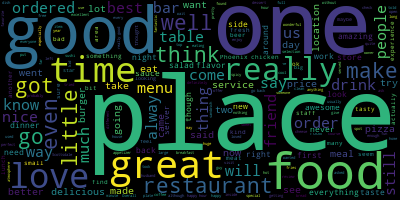

In [32]:
w.to_image()

<a id='stopwords'></a>

### Stop-Word Removal

- **What:** This process is used to remove common words that will likely appear in any text.
- **Why:** Because common words exist in most documents, they likely only add noise to your model and should be removed.

**What are stop words?**
Stop words are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners, e.g., "to," "the," "and." However, they are so commonly used that they are generally worthless for predicting the class of a document. Since "a" appears in spam and non-spam emails, for example, it would only contribute noise to our model.

Example: 

> 1. Original sentence: "The dog jumped over the fence"  
> 2. After stop-word removal: "dog jumped over fence"

The fact that there is a fence and a dog jumped over it can be derived with or without stop words.

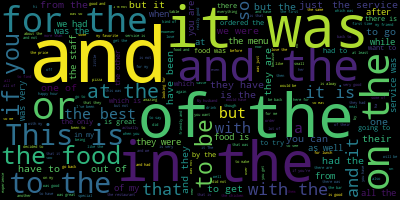

In [33]:
w = wordcloud.WordCloud(stopwords=['place'])
w.generate("\n".join(yelp.text))
w.to_image()

In [34]:
import nltk

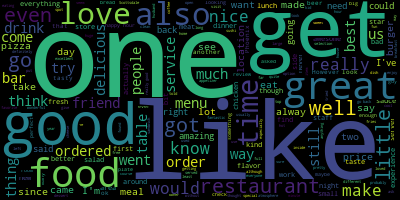

In [36]:
w = wordcloud.WordCloud(stopwords=['place'] + nltk.corpus.stopwords.words('english'))
w.generate("\n".join(yelp.text))
w.to_image() 

In [ ]:
# What do you want to predict?

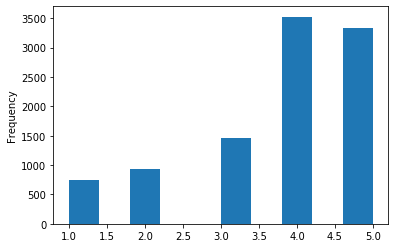

In [38]:
yelp.stars.plot.hist()

In [39]:
def stars2feedback(number_of_stars):
    if number_of_stars == 3:
        return 'neutral'
    if number_of_stars > 3:
        return 'happy'
    if number_of_stars < 3: 
        return 'sad'

yelp['feedback'] = yelp.stars.map(stars2feedback)

In [40]:
yelp.feedback.value_counts()

happy      6863
sad        1676
neutral    1461
Name: feedback, dtype: int64

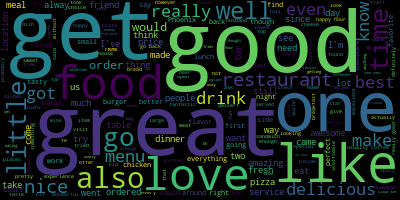

In [41]:
w = wordcloud.WordCloud(stopwords=['place'] + nltk.corpus.stopwords.words('english'))
w.generate("\n".join(yelp.text[yelp.feedback == 'happy']))
w.to_image() 

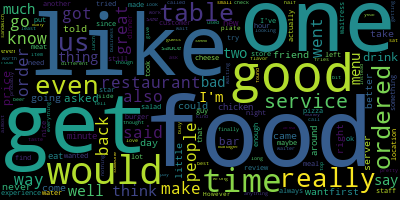

In [43]:
w = wordcloud.WordCloud(stopwords=['place'] + nltk.corpus.stopwords.words('english'))
w.generate("\n".join(yelp.text[yelp.feedback == 'sad']))
w.to_image() 

In [ ]:
# add whatever features you want to add, do a train-test split, etc.

In [44]:
import sklearn.model_selection
Xtrain, Xtest, Ytrain, Ytest =  sklearn.model_selection.train_test_split(yelp.text, yelp.feedback,
                                                                        random_state=3334)

<a id='text_class'></a>


# Introduction: Text Classification

As you proceed through this section, note that text classification is done in the same way as all other 
classification models. 

First, the **text is vectorized into a set of numeric features**.

- Bag of words?
- Bag of n-grams?
- Weighted words or ngrams?
- Dimensionality reduced skip-gram (e.g. Glove, BERT)


Then, a standard machine learning classifier is applied. NLP libraries often include vectorizers and ML models that work particularly well with text.

> We will refer to each piece of text we are trying to classify as a document.
> - For example, a document could refer to an email, book chapter, tweet, article, or text message.

**Text classification is the task of predicting which category or topic a text sample is from.**

We may want to identify:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?

**Predictions are often made by using the words as features and the label as the target output.**

Starting out, we will make each unique word (across all documents) a single feature. In any given corpora, we may have hundreds of thousands of unique words, so we may have hundreds of thousands of features!

- For a given document, the numeric value of each feature could be the number of times the word appears in the document.
    - So, most features will have a value of zero, resulting in a sparse matrix of features.

- This technique for vectorizing text is referred to as a bag-of-words model. 
    - It is called bag of words because the document's structure is lost — as if the words are all jumbled up in a bag.
    - The first step to creating a bag-of-words model is to create a vocabulary of all possible words in the corpora.

> Alternatively, we could make each column an indicator column, which is 1 if the word is present in the document (no matter how many times) and 0 if not. This vectorization could be used to reduce the importance of repeated words. For example, a website search engine would be susceptible to spammers who load websites with repeated words. So, the search engine might use indicator columns as features rather than word counts.

**We need to consider several things to decide if bag-of-words is appropriate.**

- Does order of words matter?
- Does punctuation matter?
- Does upper or lower case matter?

<a id='countvectorizer-model'></a>


### Using CountVectorizer in a Model
![DTM](images/DTM.png)

In [61]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=3, 
                                                                   token_pattern='(?u)\\b[a-z]{3,}\\b')

In [65]:
sklearn.feature_extraction.text.CountVectorizer?

In [63]:
vecTrain = count_vectorizer.fit_transform(Xtrain)
vecTrain

<7500x10216 sparse matrix of type '<class 'numpy.int64'>'
	with 524775 stored elements in Compressed Sparse Row format>

In [64]:
count_vectorizer.get_feature_names()

['aaron',
 'abandoned',
 'abc',
 'abilities',
 'ability',
 'able',
 'abode',
 'abound',
 'about',
 'above',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutly',
 'absurd',
 'abundance',
 'abysmal',
 'acai',
 'accent',
 'accented',
 'accents',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accessories',
 'accident',
 'accidentally',
 'accolades',
 'accommodate',
 'accommodated',
 'accommodating',
 'accommodation',
 'accommodations',
 'accomodate',
 'accomodated',
 'accomodating',
 'accompanied',
 'accompaniment',
 'accompaniments',
 'accompany',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishment',
 'according',
 'accordingly',
 'account',
 'accross',
 'accurate',
 'accused',
 'accustomed',
 'ace',
 'ache',
 'achieve',
 'achieved',
 'acidic',
 'acknowledge',
 'acknowledged',
 'acknowledging',
 'acoustic',
 'acoustics',
 'acquaintance',
 'acquired',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'activ

In [53]:
yelp[yelp.text.str.lower().str.contains('0buxoc0crqjpvkezo3bqog')].text.iloc[0]

'Had some time to kill before the Ultimate pleY Date Yelp event, and I\'d wanted to share my love of Nobuo\'s Dark chocolate mousse with green tea ice cream and sugared orange peels with my happy-go-lucky cousin, who has never been here before, so we stopped by at 5:17p to find that Nobuo wouldn\'t open till 5:30p, so we waited outside in the comfortable patio.\r\n\r\nAfter watching a couple of employees add lanterns to their outdoor umbrellaed tables, I noticed the "OPEN" sign on the front door, so we entered the resto, whereupon we were greeted warmly by a male host and shown to a two-top.  I didn\'t like the energy in that room, so I asked if we could sit elsewhere, and he said to choose wherever we wanted to sit.  We were the first customers, so we chose a four-top, knowing we wouldn\'t be taking up space for very long, anyway.  Glasses of water were delivered, and soon we met our female server (whose name on the receipt reflected "Butai").  When she laid down the menus, I told her

# Make a model!

Logistic regression often works well. Support Vector Machines are usually good too.

(Decision trees and random forests usually take too long)

In [69]:
import sklearn.linear_model
lr = sklearn.linear_model.LogisticRegressionCV(solver='lbfgs', multi_class="auto", max_iter=1000, cv=5)
lr.fit(vecTrain, Ytrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

### How do measure the success of this model?

In [71]:
vecTest = count_vectorizer.transform(Xtest)
predictions = lr.predict(vecTest)

In [72]:
import sklearn.metrics

In [81]:
sklearn.metrics.confusion_matrix(Ytest, predictions)

array([[1596,   63,   38],
       [ 234,   92,   54],
       [ 113,   35,  275]], dtype=int64)

In [83]:
pd.Series(predictions).value_counts()

happy      1943
sad         367
neutral     190
dtype: int64

In [84]:
Ytest.value_counts()

happy      1697
sad         423
neutral     380
Name: feedback, dtype: int64

([<matplotlib.axis.YTick at 0x25081d85358>,
 <a list of 3 Text yticklabel objects>)

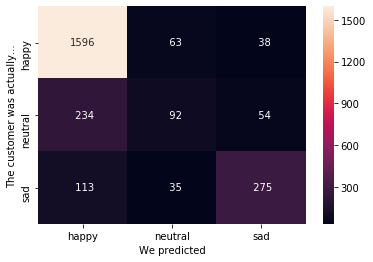

In [93]:
import seaborn as sns
sns.heatmap(sklearn.metrics.confusion_matrix(Ytest, predictions), annot=True, fmt='4d')
import matplotlib.pyplot as plt
plt.xlabel("We predicted")
plt.ylabel("The customer was actually...")
plt.xticks([0.5,1.5,2.5],["happy", "neutral", "sad"])
plt.yticks([0.5,1.5,2.5],["happy", "neutral", "sad"])

In [92]:
print(sklearn.metrics.classification_report(Ytest, predictions))

              precision    recall  f1-score   support

       happy       0.82      0.94      0.88      1697
     neutral       0.48      0.24      0.32       380
         sad       0.75      0.65      0.70       423

    accuracy                           0.79      2500
   macro avg       0.68      0.61      0.63      2500
weighted avg       0.76      0.79      0.76      2500



In [73]:
sklearn.metrics.accuracy_score(Ytest, predictions)

0.7852

In [75]:
sklearn.metrics.precision_score(Ytest, predictions, average='weighted')

0.7579579784063801

In [76]:
sklearn.metrics.recall_score(Ytest, predictions, average='weighted')

0.7852

In [77]:
sklearn.metrics.f1_score(Ytest, predictions, average='weighted')

0.7621195196364816

In [78]:
prediction_proba = lr.predict_proba(vecTest)
prediction_proba

array([[0.75696614, 0.21762062, 0.02541323],
       [0.94726608, 0.03950975, 0.01322417],
       [0.71989965, 0.20040839, 0.07969196],
       ...,
       [0.65669623, 0.25166117, 0.0916426 ],
       [0.03998995, 0.01371128, 0.94629877],
       [0.90494903, 0.08536901, 0.00968195]])

In [79]:
Xtest.head(3)

review_id
WeNhaODwNX1qmMXp5Y2bMg    I've got to admit, fishing at the Water Ranch ...
fdvuKm4JIKrcn5nWxqpX1A    Great all natural selection, if you are lookin...
v5mmm3T1XILyR0txwDVVJg    A nice place to go to catch the blockbuster mo...
Name: text, dtype: object

In [80]:
sklearn.metrics.auc(Ytest, prediction_proba)

ValueError: bad input shape (2500, 3)

### What do the coefficients of the model mean?

In [94]:
lr

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [96]:
lr.coef_.shape

(3, 10216)

In [98]:
len(count_vectorizer.get_feature_names())

10216

In [99]:
happy_words = pd.Series(index=count_vectorizer.get_feature_names(), data=lr.coef_[0])
happy_words.sort_values(ascending=False)

delicious     0.602230
amazing       0.569015
best          0.467168
excellent     0.466536
great         0.444274
awesome       0.442240
fantastic     0.439503
love          0.433888
recommend     0.413743
perfect       0.403618
fresh         0.354893
favorite      0.342294
definitely    0.313583
highly        0.306969
yummy         0.301409
man           0.296871
perfectly     0.292773
loved         0.281307
friendly      0.261716
mouth         0.257870
valley        0.250707
wonderful     0.245004
happy         0.232986
tasty         0.227626
super         0.226272
packed        0.221455
good          0.216034
perfection    0.209262
crispy        0.208714
crazy         0.208223
                ...   
waitress     -0.232964
terrible     -0.234682
somewhere    -0.235894
floor        -0.237171
mess         -0.240482
rather       -0.244025
sorry        -0.250956
maybe        -0.251130
tasted       -0.254607
rude         -0.261098
chinese      -0.264360
awful        -0.267726
worst      

In [100]:
lr.predict(count_vectorizer.transform(["delicious and amazing"]))

array(['happy'], dtype=object)

In [101]:
sad_words = pd.Series(index=count_vectorizer.get_feature_names(), data=lr.coef_[2])
sad_words.sort_values(ascending=False)

overpriced       0.492693
bland            0.449561
worst            0.434358
horrible         0.376751
poor             0.337425
tasted           0.319863
gross            0.303760
dry              0.298081
wasn             0.289324
elsewhere        0.282000
terrible         0.274079
sucks            0.268210
awful            0.266458
mediocre         0.259161
money            0.255960
bad              0.243696
business         0.241747
rude             0.239357
disappointed     0.237318
disappointing    0.230934
crowd            0.228090
not              0.220050
nothing          0.215303
mistake          0.214829
sick             0.207418
meat             0.206551
won              0.205912
based            0.203756
wouldn           0.203350
excited          0.203189
                   ...   
huge            -0.208411
wonderful       -0.212137
fun             -0.213429
visit           -0.213975
noodles         -0.214027
decent          -0.217285
super           -0.217756
choice      

In [102]:
neutral_words = pd.Series(index=count_vectorizer.get_feature_names(), data=lr.coef_[1])
neutral_words.sort_values(ascending=False)

however        0.384116
decent         0.359799
solid          0.315117
though         0.288480
stars          0.271338
alright        0.261854
average        0.249794
airport        0.235694
choice         0.230442
okay           0.220981
taste          0.208745
salads         0.203607
nothing        0.201232
burrito        0.198989
bathrooms      0.197349
visit          0.195049
bbq            0.182428
restaurants    0.182400
desert         0.181542
flavors        0.181282
afternoon      0.181177
movie          0.180528
lacked         0.180204
patio          0.179333
usually        0.178217
but            0.177241
walk           0.176923
view           0.176619
write          0.173944
craving        0.172763
                 ...   
remember      -0.160538
excited       -0.160695
surprised     -0.162740
worst         -0.162907
priced        -0.163154
stands        -0.164735
business      -0.165283
gross         -0.166457
amazing       -0.172759
let           -0.173494
tried         -0

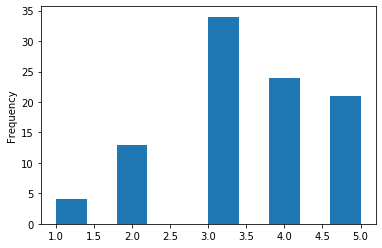

In [104]:
yelp[yelp.text.str.lower().str.contains('airport')].stars.plot.hist()

In [105]:
happy_words[happy_words.abs() < 0.01]

aaron             0.008315
abode            -0.006140
absence           0.008226
absurd            0.006072
accented         -0.004862
acceptable       -0.000342
accepted          0.000714
accepting        -0.009052
accessories      -0.008420
accident          0.006509
accolades         0.006865
accommodate       0.005950
accommodation    -0.003165
accommodations   -0.005316
accomodate        0.000325
accomodating      0.003375
accompany         0.002749
accomplish       -0.008923
accomplishment   -0.002624
according        -0.002554
accross           0.007689
acidic            0.008782
acknowledging    -0.003545
acoustic         -0.004884
acquired         -0.009575
acting           -0.007352
adams             0.003236
added            -0.009853
additions         0.005932
addressed         0.002424
                    ...   
wooden            0.001094
worn             -0.001251
worrying          0.001493
wouldve           0.008979
wowza            -0.003401
wrap             -0.000752
w

In [106]:
prediction_proba

array([[0.75696614, 0.21762062, 0.02541323],
       [0.94726608, 0.03950975, 0.01322417],
       [0.71989965, 0.20040839, 0.07969196],
       ...,
       [0.65669623, 0.25166117, 0.0916426 ],
       [0.03998995, 0.01371128, 0.94629877],
       [0.90494903, 0.08536901, 0.00968195]])

Let's take a look next at other ways of preprocessing text!

- **Objective:** Demonstrate common text preprocessing techniques.

<a id='ngrams'></a>
### N-Grams

N-grams are features which consist of N consecutive words. This is useful because using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`!

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [107]:
sad_words[sad_words.index == 'not']

not    0.22005
dtype: float64

In [108]:
happy_words[happy_words.index == 'not']

not   -0.273479
dtype: float64

In [116]:
ngram_vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=2, 
                                                                   ngram_range=(2,3),
                                                                   token_pattern='(?u)\\b[a-z]{2,}\\b')
ngramTrainVecs = ngram_vectorizer.fit_transform(Xtrain)

In [117]:
ngramTrainVecs.shape

(7500, 154450)

In [118]:
ngram_vectorizer.get_feature_names()

['abandoned it',
 'ability to',
 'ability to read',
 'able to',
 'able to accommodate',
 'able to bring',
 'able to clear',
 'able to continue',
 'able to do',
 'able to eat',
 'able to enjoy',
 'able to find',
 'able to finish',
 'able to fit',
 'able to get',
 'able to give',
 'able to go',
 'able to grab',
 'able to handle',
 'able to have',
 'able to hear',
 'able to help',
 'able to keep',
 'able to make',
 'able to order',
 'able to purchase',
 'able to read',
 'able to say',
 'able to seat',
 'able to see',
 'able to sit',
 'able to speak',
 'able to stay',
 'able to stomach',
 'able to take',
 'able to taste',
 'able to tell',
 'able to try',
 'able to update',
 'able to visit',
 'able to walk',
 'able to watch',
 'about all',
 'about all can',
 'about all of',
 'about all the',
 'about all there',
 'about am',
 'about an',
 'about an hour',
 'about an ice',
 'about and',
 'about and it',
 'about and the',
 'about and we',
 'about another',
 'about any',
 'about any dish',
 'ab

In [122]:
ngram_lr = sklearn.linear_model.LogisticRegressionCV(multi_class='auto', solver='lbfgs', cv=5)
ngram_lr.fit(ngramTrainVecs, Ytrain)

KeyboardInterrupt: 

In [ ]:
ngram_predictions = ngram_lr.predict(ngram_vectorizer.transform(Xtest))
sklearn.metrics.accuracy_score(Ytest, ngram_predictions)

In [ ]:
print(sklearn.metrics.classification_report(Ytest, predictions))

In [123]:
import sklearn.svm
svc = sklearn.svm.SVC()
svc.fit(ngramTrainVecs, Ytrain)

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [124]:
svc_predictions = svc.predict(ngram_vectorizer.transform(Xtest))
sklearn.metrics.accuracy_score(Ytest, svc_predictions)

0.6788

<a id='tfidf'></a>
## Term Frequency–Inverse Document Frequency (TF–IDF)

While a Count Vectorizer simply totals up the number of times a "word" appears in a document, the more complex TF-IDF Vectorizer analyzes the uniqueness of words between documents to find distinguishing characteristics. 
     
- **What:** Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.
- **Why:** It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).
- **Notes:** It's used for search-engine scoring, text summarization, and document clustering.

In [126]:
happy_words[happy_words.index=='place']

place   -0.025766
dtype: float64

In [127]:
happy_words[happy_words.index=='food']

food   -0.081679
dtype: float64

In [128]:
yelp.text.str.lower().str.contains('food').mean()

0.4068

In [129]:
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(min_df=3, token_pattern='(?u)\\b[a-z]{3,}\\b')

In [130]:
tfidf_train_vec = tfidf.fit_transform(Xtrain)

In [131]:
tfidf_lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')
tfidf_lr.fit(tfidf_train_vec, Ytrain)

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
tfidf_happy_words = pd.Series(index=tfidf.get_feature_names(), data=tfidf_lr.coef_[0])
tfidf_happy_words.sort_values(ascending=False)

great         4.377721
delicious     3.548630
best          3.454495
love          3.118825
amazing       3.100291
awesome       2.559706
excellent     2.526321
fantastic     2.323257
and           2.229671
perfect       2.198800
definitely    2.030422
favorite      2.013245
recommend     1.916566
very          1.902763
fresh         1.886651
friendly      1.690858
loved         1.624733
good          1.609616
highly        1.605200
perfectly     1.539008
always        1.503894
can           1.501974
wonderful     1.488039
yummy         1.408069
every         1.317587
super         1.288501
tasty         1.266203
phoenix       1.250437
well          1.244254
day           1.237587
                ...   
chinese      -1.270263
give         -1.280881
rather       -1.327353
tasted       -1.356691
seem         -1.372320
rude         -1.387553
elsewhere    -1.401985
wouldn       -1.477554
dry          -1.479903
don          -1.525956
horrible     -1.538794
worst        -1.539132
mediocre   

In [134]:
happy_words.sort_values(ascending=False)

delicious     0.602230
amazing       0.569015
best          0.467168
excellent     0.466536
great         0.444274
awesome       0.442240
fantastic     0.439503
love          0.433888
recommend     0.413743
perfect       0.403618
fresh         0.354893
favorite      0.342294
definitely    0.313583
highly        0.306969
yummy         0.301409
man           0.296871
perfectly     0.292773
loved         0.281307
friendly      0.261716
mouth         0.257870
valley        0.250707
wonderful     0.245004
happy         0.232986
tasty         0.227626
super         0.226272
packed        0.221455
good          0.216034
perfection    0.209262
crispy        0.208714
crazy         0.208223
                ...   
waitress     -0.232964
terrible     -0.234682
somewhere    -0.235894
floor        -0.237171
mess         -0.240482
rather       -0.244025
sorry        -0.250956
maybe        -0.251130
tasted       -0.254607
rude         -0.261098
chinese      -0.264360
awful        -0.267726
worst      

# An introduction to Spacy

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python, and one of the
best available.

It is a bit slow though. For something faster that is less comprehensive, Facebook have "fasttext"

In [135]:
import spacy

In [136]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [ ]:
# call nlp() on a string to turn it into a document

In [3]:
# look at each word in each sentence and see 
# - orth_
# - pos_
# - tag_
# - dep_
# - lemma_
# - head.lemma_

In [ ]:
# Look for past tense verbs only?

In [162]:
def past_verbs(doc):
    answer = []
    for sentence in doc.sents:
        for word in sentence:
            if word.tag_ == 'VBD':
                #answer.append(word.lemma_)
                answer.append(word.orth_)
    return " ".join(answer)

In [ ]:
# How does the model perform only on verbs? What sort of coefficients do you see?

In [ ]:
# What about adjectives only? What do you notice about these adjectives?

<a id='sentiment'></a>
## Sentiment Analysis

Understanding how positive or negative a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of "positive" words and a list of "negative" words and count how many occur in a document. 
- Train a classifier given many examples of "positive" documents and "negative" documents. 
    - Note that this technique is often just an automated way to derive the first (e.g., using bag-of-words with logistic regression, a coefficient is assigned to each word!).

For the most accurate sentiment analysis, you will want to train a custom sentiment model based on documents that are particular to your application. Generic models (such as the one we are about to use!) often do not work as well as hoped.

As we will do below, always make sure you double-check that the algorithm is working by manually verifying that scores correctly correspond to positive/negative reviews! Otherwise, you may be using numbers that are not accurate.

In [138]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     D:\Users\gregb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


True

In [140]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     D:\Users\gregb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [141]:
from nltk.corpus import sentiwordnet as swn

In [143]:
list(swn.senti_synsets('dog'))

[SentiSynset('dog.n.01'),
 SentiSynset('frump.n.01'),
 SentiSynset('dog.n.03'),
 SentiSynset('cad.n.01'),
 SentiSynset('frank.n.02'),
 SentiSynset('pawl.n.01'),
 SentiSynset('andiron.n.01'),
 SentiSynset('chase.v.01')]

In [144]:
list(swn.senti_synsets('great'))

[SentiSynset('great.n.01'),
 SentiSynset('great.s.01'),
 SentiSynset('great.s.02'),
 SentiSynset('great.s.03'),
 SentiSynset('bang-up.s.01'),
 SentiSynset('capital.s.03'),
 SentiSynset('big.s.13')]

In [152]:
great_adj = list(swn.senti_synsets('great'))[1]
great_adj.pos_score()

0.0

In [155]:
list(swn.senti_synsets('awesome'))[0].pos_score()

0.875

In [157]:
list(swn.senti_synsets('awesome'))[0].neg_score()

0.125

In [158]:
list(swn.senti_synsets('terrible'))[0].neg_score()

0.625

In [159]:
list(swn.senti_synsets('terrible'))[0].pos_score()

0.0

In [ ]:
# swn.senti_synsets(...)

In [ ]:
# list(swn.senti_synsets(...))[0].pos_score()

<a id='add_feat'></a>
## Bonus: Adding Features to a Document-Term Matrix

Here, we will add additional features to our `CountVectorizer()`-generated feature set to hopefully improve our model.

To make the best models, you will want to supplement the auto-generated features with new features you think might be important. After all, `CountVectorizer()` typically lowercases text and removes all associations between words. Or, you may have metadata to add in addition to just the text.

> Remember: Although you may have hundreds of thousands of features, each data point is extremely sparse. So, if you add in a new feature, e.g., one that detects if the text is all capital letters, this new feature can still have a huge effect on the model outcome!

In [ ]:
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

<a id='conclusion'></a>
## Conclusion

- NLP is a gigantic field.
- Understanding the basics broadens the types of data you can work with.
- Simple techniques go a long way.
- Use scikit-learn for NLP whenever possible.

While we used SKLearn and TextBlob today, another popular python NLP library is [Spacy](https://spacy.io).